In [1]:
#!pip install kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# Descarga el dataset Breast Cancer Wisconsin
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("✅ Dataset descargado en:", path)

os.listdir(path)



Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
✅ Dataset descargado en: /kaggle/input/breast-cancer-wisconsin-data


['data.csv']

In [4]:

df = pd.read_csv(os.path.join(path, "data.csv"))
print(df.head())
print(df.info())
# Eliminar columnas innecesarias
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Mapear valores M/B a 1/0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

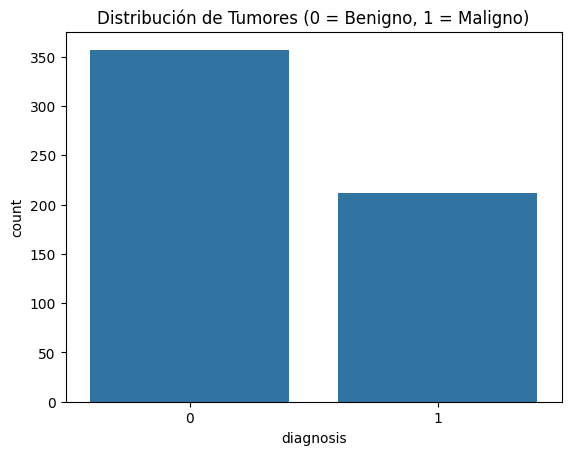

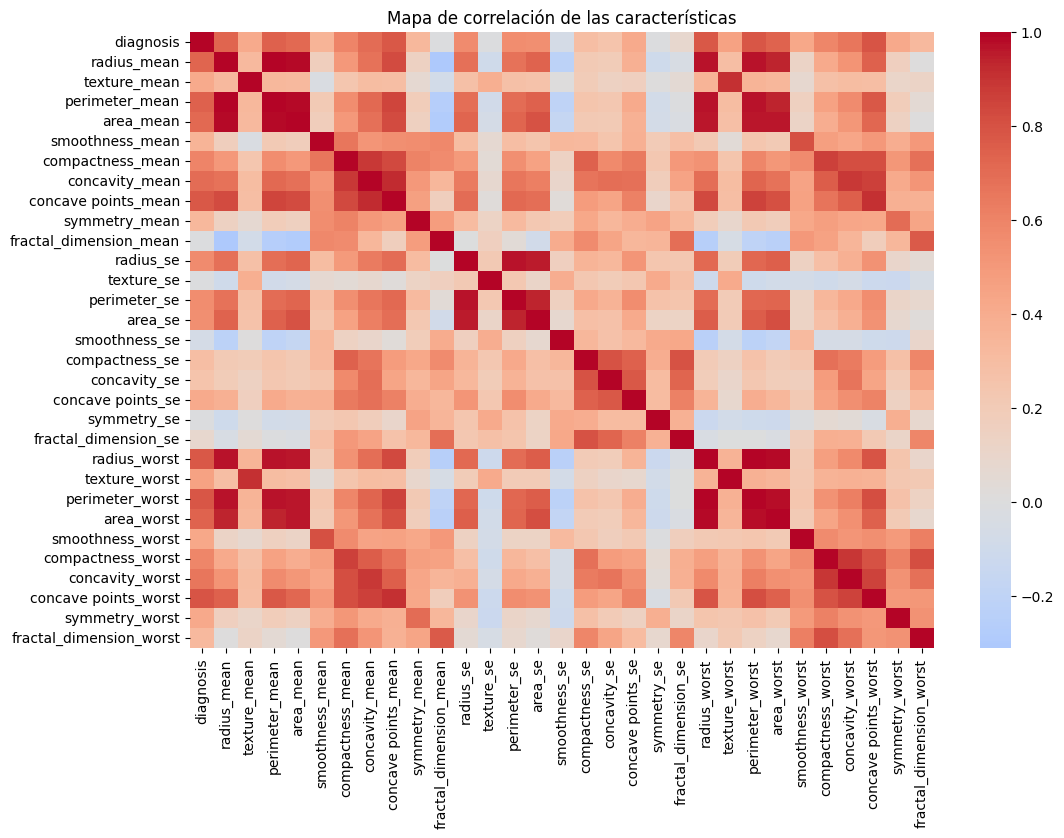

In [5]:
sns.countplot(x='diagnosis', data=df)
plt.title("Distribución de Tumores (0 = Benigno, 1 = Maligno)")
plt.show()
#MAPA DE CORRELACION
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Mapa de correlación de las características")
plt.show()

In [7]:
#FEATURES & TARGET

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#NORMALIZAR
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



Accuracy: 0.9649122807017544

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



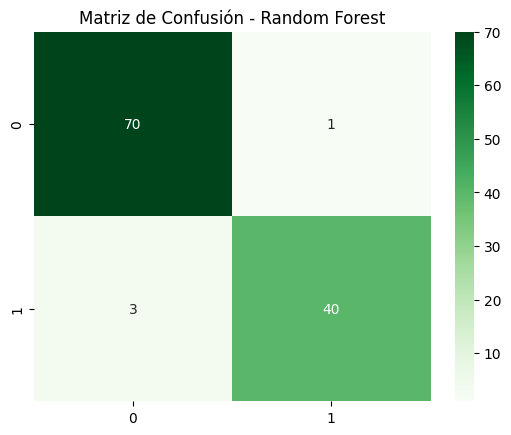

In [8]:
#Entrenar un Random Forest
rf = RandomForestClassifier(
    n_estimators=100,       # número de árboles
    max_depth=5,            # profundidad máxima (controla la poda)
    min_samples_leaf=4,     # hojas mínimas por nodo
    random_state=42
)

rf.fit(x_train_scaled, y_train)

#EVALUAR MODELO
y_pred = rf.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.show()



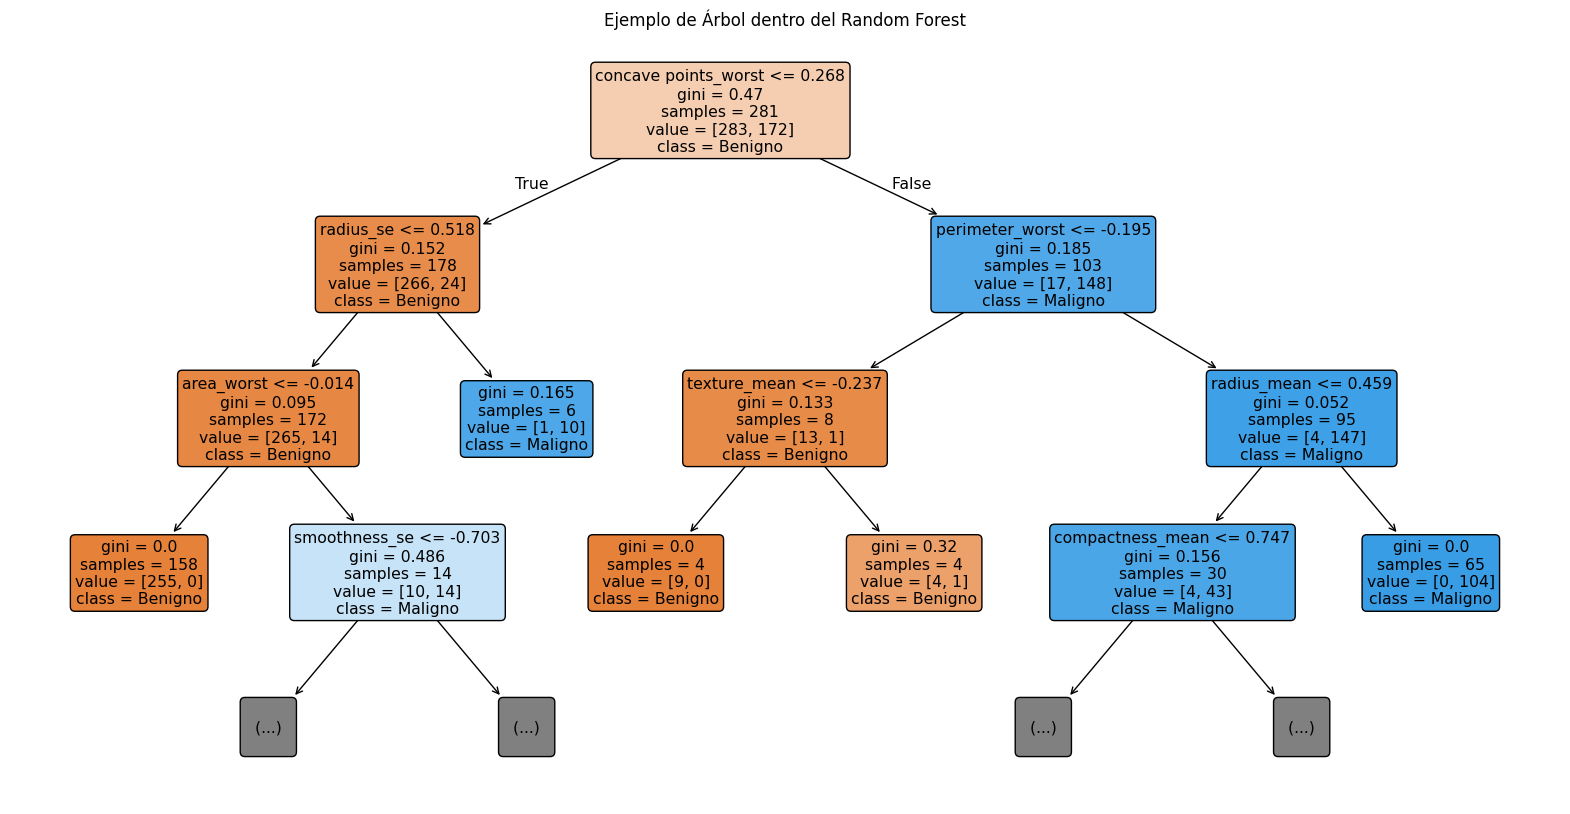

In [9]:
#VISUALIZAR ARBOL
plt.figure(figsize=(20,10))
tree = rf.estimators_[0]  # tomar el primer árbol del bosque
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=["Benigno", "Maligno"],
    filled=True,
    rounded=True,
    max_depth=3  # mostrar hasta nivel 3 para claridad
)
plt.title("Ejemplo de Árbol dentro del Random Forest")
plt.show()


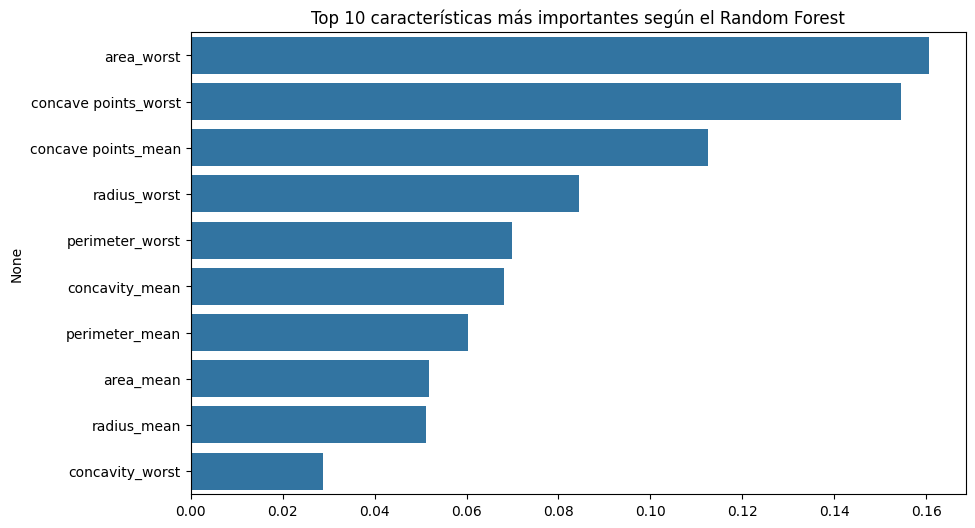

In [10]:
#CARACTERISTICAS
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10])
plt.title("Top 10 características más importantes según el Random Forest")
plt.show()
